In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install pycountry
import pycountry

In [2]:
#reading data
df = pd.read_csv('/content/fake_job_postings.csv')

### **EDA**

In [3]:
#visualizing the data
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
print("DataFrame Shape" , df.shape)
print("Fraudulent Data Distribution", df.value_counts("fraudulent") )

DataFrame Shape (17880, 18)
Fraudulent Data Distribution fraudulent
0    17014
1      866
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


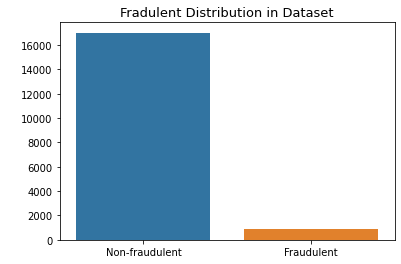

In [6]:
#Distribution of fradulent feature

fig = plt.subplots(1,1)
temp = df["fraudulent"].value_counts()
sns.barplot(temp.index, temp)
label  = ["Non-fraudulent", "Fraudulent"]
x = [0,1] 
plt.ylabel(' ')
plt.xticks(x , label)
plt.title('Fradulent Distribution in Dataset', fontsize=13)
plt.show()

In [7]:
#Finding unique attribute values. 
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [8]:
#finding range of missing values
df.isna().sum() / len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [9]:
df2 = df.copy()

In [10]:
# dropping on the base of domain knowledge and missiing values
df2.drop(['job_id','department','salary_range','benefits'], axis = 1, inplace = True)

In [11]:
df2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### **Handling** **Missing** **values**

In [12]:
#finding null values 
df2.isna().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [13]:
df2 = df2.sort_values('title').reset_index(drop = True)

In [14]:
# Delete one null row of description 
df2 = df2[df2['description'].notna()]

##Hyptheses 1 - Number of words used in real and fake jobs are significantly different

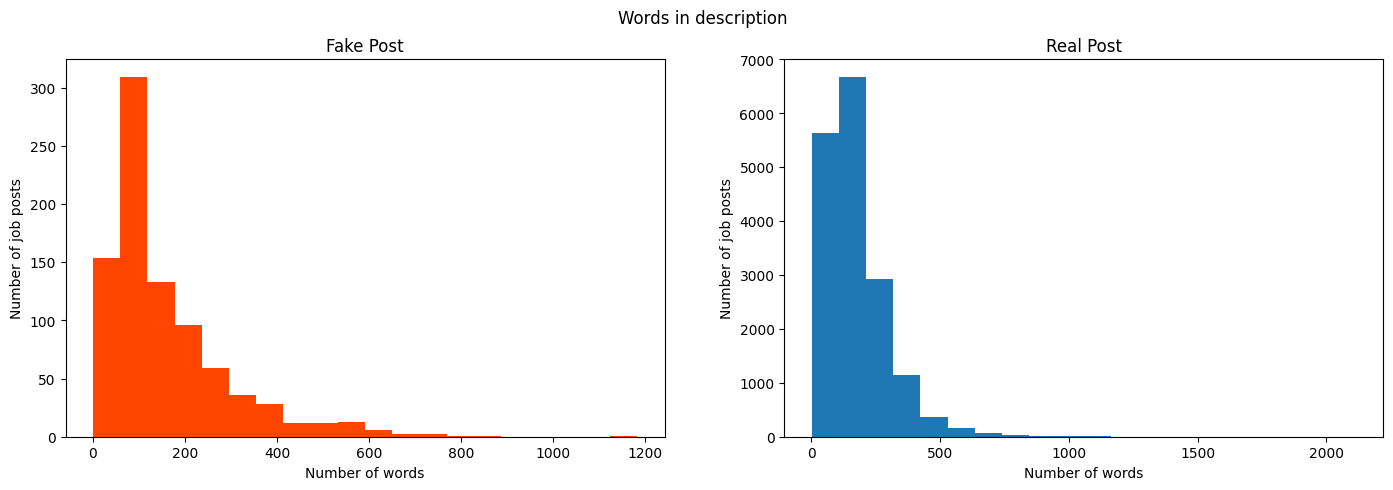

In [15]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=df2[df2["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=df2[df2["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
ax1.set_xlabel('Number of words')
ax1.set_ylabel("Number of job posts")
ax2.set_xlabel('Number of words')
ax2.set_ylabel("Number of job posts")
plt.savefig("number of words")
plt.show()

In [16]:
# Backward filling the null values before below columns
df2['employment_type'] = df2['employment_type'].bfill(axis=0)
df2['required_experience'] = df2['required_experience'].bfill(axis=0)
df2['required_education'] = df2['required_education'].bfill(axis = 0)
df2['industry'] = df2['industry'].bfill(axis=0)
df2['function'] = df2['function'].bfill(axis=0)

In [17]:
# verifying after backward filling
df2.isna().sum()

title                     0
location                346
company_profile        3307
description               0
requirements           2694
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           2
required_experience       2
required_education        2
industry                  2
function                  2
fraudulent                0
dtype: int64

In [18]:
# dropping rest of all null values
df2 = df2.dropna(axis = 0, how = 'any')

In [19]:
#remove duplicates
df2 = df2.drop_duplicates(keep = 'first')

In [20]:
df2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,"EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Zylun’s mission is to help small and medium si...,Responsibilities:Using a project database syst...,Requirements:1-3 years’ experience of CAD base...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0
13,Accounting Clerk,"US, TX, AUSTIN",As the industry’s largest supply contracting c...,"Job DescriptionVerify, obtain approvals and pa...",High School diploma requiredProficient in usin...,0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1


##Hyptheses 2 - Fake jobs are independent of Career levels

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


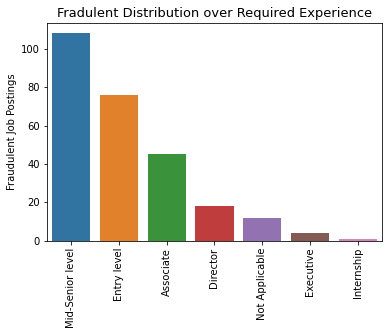

In [21]:
fig = plt.subplots(1,1)
temp = df2[df2["fraudulent"]==1]['required_experience'].value_counts()
sns.barplot(temp.index, temp)
plt.ylabel('Fraudulent Job Postings')
plt.xticks(rotation=90)
plt.title('Fradulent Distribution over Required Experience', fontsize=13)
plt.savefig("Expereince")
plt.show()

##Hyptheses 3 - There is no recruitment process for fake jobs

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


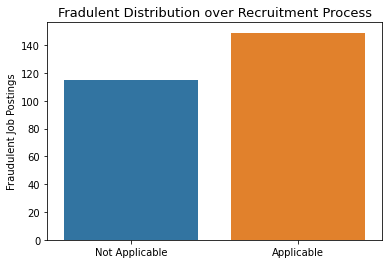

In [22]:
fig = plt.subplots(1,1)
temp = temp = df2[df2["fraudulent"]==1]['has_questions'].value_counts()
sns.barplot(temp.index, temp)
label  = ["Not Applicable", "Applicable"]
x = [0,1] 
plt.ylabel('Fraudulent Job Postings')
plt.xticks(x , label)
plt.title('Fradulent Distribution over Recruitment Process', fontsize=13)
plt.savefig("recruitment")
plt.show()

In [23]:
# combining description, requirement and company  profile because they provide similar information for job
df2['description'] = df2['description'] + ' ' + df2['requirements'] + ' ' + df2['company_profile']
df2.drop(['company_profile', 'requirements'], axis = 1, inplace = True)

In [24]:
df2.head(3)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1


In [25]:
#Splitting location on the base of city and country code 
df2['city'] = df2['location'].str.split(',', expand = True)[2]
df2['country_code'] = df2['location'].str.split(',', expand=True)[0]


In [26]:
df2.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_code
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,US
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,US
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,US
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,PH
13,Accounting Clerk,"US, TX, AUSTIN","Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,US


In [27]:
# filling by empty city by NAN
df2.loc[df2['city'] == ' ', 'city'] = np.nan

In [28]:
df2.isnull().sum()

title                    0
location                 0
description              0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
city                   992
country_code             0
dtype: int64

In [29]:
df2.dropna(inplace = True)

In [30]:
# Getting country name based on country code
country_list = [i.alpha_2 for i in list(pycountry.countries)]
def get_country_name(df):
    if df['country_code'] in country_list:
        return pycountry.countries.get(alpha_2 = df['country_code']).name
df2['country_name'] = df2.apply(get_country_name, axis = 1)

In [31]:
# removing redundant features
df2.drop(['location', 'country_code'], axis = 1, inplace = True)

In [32]:
df2.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [33]:
df2.shape

(11272, 13)

In [34]:
df_final = df2.copy()

In [35]:
df_final.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [38]:
df_final.to_csv('Preprocessed_data.csv')